In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/SET_project_1/SER/data/RAV_TESS/Actor_28/10-11-01-74-43-65-16.wav')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

# Data Loading

In [ ]:
import joblib
X = joblib.load('/content/drive/MyDrive/SET_project_1/SER/Model2_using_multiple_dataset/final_x.joblib')
y = joblib.load('/content/drive/MyDrive/SET_project_1/SER/Model2_using_multiple_dataset/final_y.joblib')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=35, shuffle=True, stratify=y)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=30, test_size=0.25, shuffle=True, stratify=y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((47844, 2376), (3987, 2376), (1329, 2376), (47844,), (3987,), (1329,))

In [ ]:
X_train[:5]

array([[-0.40657702, -0.34502202,  0.14039184, ...,  0.06177496,
         0.07898575,  0.05668685],
       [-0.5360738 , -0.55060508, -0.54499461, ...,  0.06177496,
         0.07898575,  0.05668685],
       [-0.46413115, -0.49186707, -0.52252292, ...,  0.06177496,
         0.07898575,  0.05668685],
       [ 0.93155628,  0.47731024,  0.41005208, ...,  0.24220831,
        -0.14499637, -0.58319098],
       [-0.15477775,  0.24235817,  0.83701413, ...,  0.06177496,
         0.07898575,  0.05668685]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, X_val.shape

((47844, 2376), (3987, 2376), (1329, 2376))

In [ ]:
X_train[:5]

array([[-0.40657702, -0.34502202,  0.14039184, ...,  0.06177496,
         0.07898575,  0.05668685],
       [-0.5360738 , -0.55060508, -0.54499461, ...,  0.06177496,
         0.07898575,  0.05668685],
       [-0.46413115, -0.49186707, -0.52252292, ...,  0.06177496,
         0.07898575,  0.05668685],
       [ 0.93155628,  0.47731024,  0.41005208, ...,  0.24220831,
        -0.14499637, -0.58319098],
       [-0.15477775,  0.24235817,  0.83701413, ...,  0.06177496,
         0.07898575,  0.05668685]])

In [ ]:
import numpy as np
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((47844, 2376, 1), (3987, 2376, 1), (1329, 2376, 1))

In [ ]:
y_train.shape, y_test.shape, y_val.shape

((47844,), (3987,), (1329,))

In [ ]:
X_train[:5]

array([[[-0.40657702],
        [-0.34502202],
        [ 0.14039184],
        ...,
        [ 0.06177496],
        [ 0.07898575],
        [ 0.05668685]],

       [[-0.5360738 ],
        [-0.55060508],
        [-0.54499461],
        ...,
        [ 0.06177496],
        [ 0.07898575],
        [ 0.05668685]],

       [[-0.46413115],
        [-0.49186707],
        [-0.52252292],
        ...,
        [ 0.06177496],
        [ 0.07898575],
        [ 0.05668685]],

       [[ 0.93155628],
        [ 0.47731024],
        [ 0.41005208],
        ...,
        [ 0.24220831],
        [-0.14499637],
        [-0.58319098]],

       [[-0.15477775],
        [ 0.24235817],
        [ 0.83701413],
        ...,
        [ 0.06177496],
        [ 0.07898575],
        [ 0.05668685]]])

# DNN 2 with added augmented data.

In [ ]:
import pandas as pd
import numpy as np

import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,LSTM
from keras.utils import np_utils, to_categorical

In [ ]:
from keras.preprocessing import sequence
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
X_train.shape[1], 1

(2376, 1)

In [ ]:
model2 = Sequential()

model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1), name='Input'))
model2.add(BatchNormalization(name='Batch_Normalization_layer_1'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same', name='MaxPooling_layer_1'))

model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', name='Conv1D_layer_2'))
model2.add(BatchNormalization(name='Batch_Normalization_layer_2'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same', name='MaxPooling_layer_2'))

model2.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu', name='Conv1D_layer_3'))
model2.add(BatchNormalization(name='Batch_Normalization_layer_3'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same', name='MaxPooling_layer_3'))
model2.add(Dropout(0.2, name='Dropout_0.2'))

model2.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', name='Conv1D_layer_4'))
model2.add(BatchNormalization(name='Batch_Normalization_layer_4'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same', name='MaxPooling_layer_4'))

model2.add(Flatten(name='Flatten_layer_1'))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization(name='Batch_Normalization_layer_5'))
model2.add(Dropout(0.25, name='Dropout_0.25'))

model2.add(Dense(9, name='Dense_layer_1'))
model2.add(Activation('softmax', name= "Output"))

In [ ]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv1D)              (None, 2376, 256)         1536      
                                                                 
 Batch_Normalization_layer_1  (None, 2376, 256)        1024      
  (BatchNormalization)                                           
                                                                 
 MaxPooling_layer_1 (MaxPool  (None, 1188, 256)        0         
 ing1D)                                                          
                                                                 
 Conv1D_layer_2 (Conv1D)     (None, 1188, 256)         327936    
                                                                 
 Batch_Normalization_layer_2  (None, 1188, 256)        1024      
  (BatchNormalization)                                           
                                                     

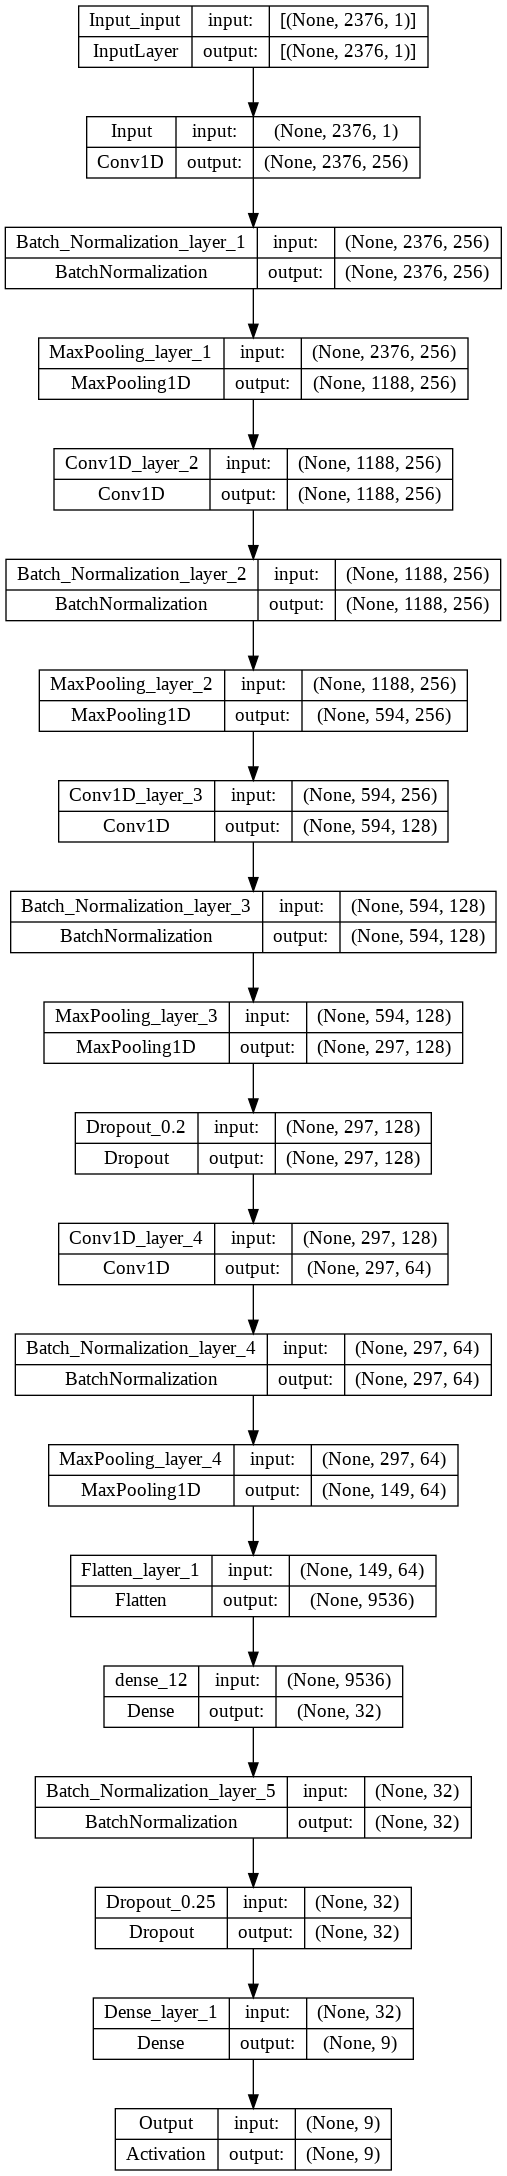

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# opt = keras.optimizers.RMSprop(learning_rate=0.000005, rho=0.9, epsilon=1e-07, decay=0.0)
opt = keras.optimizers.Adam(learning_rate=0.0005)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks=[learning_rate_reduction]

In [ ]:
cnnhistory2=model2.fit(X_train, y_train, batch_size=32, epochs=80, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/80
1496/1496 [==============================] - 106s 65ms/step - loss: 1.5189 - accuracy: 0.4465 - val_loss: 1.3693 - val_accuracy: 0.5245 - lr: 5.0000e-04
Epoch 2/80
1496/1496 [==============================] - 97s 65ms/step - loss: 1.2019 - accuracy: 0.5435 - val_loss: 1.1455 - val_accuracy: 0.5628 - lr: 5.0000e-04
Epoch 3/80
1496/1496 [==============================] - 97s 65ms/step - loss: 1.0880 - accuracy: 0.5896 - val_loss: 1.0818 - val_accuracy: 0.6035 - lr: 5.0000e-04
Epoch 4/80
1496/1496 [==============================] - 97s 65ms/step - loss: 1.0027 - accuracy: 0.6220 - val_loss: 0.9181 - val_accuracy: 0.6546 - lr: 5.0000e-04
Epoch 5/80
1496/1496 [==============================] - 97s 65ms/step - loss: 0.9225 - accuracy: 0.6553 - val_loss: 0.8388 - val_accuracy: 0.6810 - lr: 5.0000e-04
Epoch 6/80
1496/1496 [==============================] - 96s 64ms/step - loss: 0.8620 - accuracy: 0.6782 - val_loss: 0.8667 - val_accuracy: 0.6855 - lr: 5.0000e-04
Epoch 7/80
1496/1496 

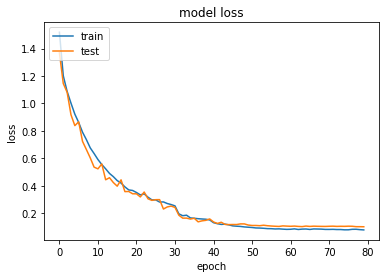

In [ ]:
plt.plot(cnnhistory2.history['loss'])
plt.plot(cnnhistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

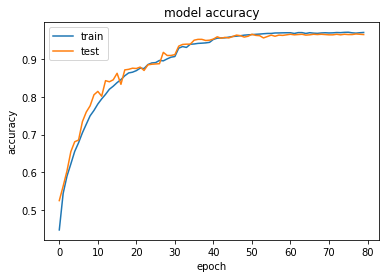

In [ ]:
plt.plot(cnnhistory2.history['accuracy'])
plt.plot(cnnhistory2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model2.evaluate(X_test, y_test)

125/125 [==============================] - 3s 21ms/step - loss: 0.1551 - accuracy: 0.9561


[0.1551087647676468, 0.9561073780059814]

In [ ]:
predictions2 = np.argmax(model2.predict(X_test), axis=-1)

125/125 [==============================] - 2s 18ms/step


In [ ]:
predictions2, y_test

(array([3, 2, 5, ..., 4, 0, 5]), array([3, 2, 5, ..., 4, 2, 5]))

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions2)
print(report)
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised, 8 = boredom

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       559
           1       0.97      0.93      0.95        60
           2       0.95      0.95      0.95       620
           3       0.95      0.95      0.95       616
           4       0.96      0.96      0.96       655
           5       0.95      0.96      0.96       620
           6       0.95      0.94      0.95       610
           7       0.98      0.97      0.98       198
           8       1.00      0.98      0.99        49

    accuracy                           0.96      3987
   macro avg       0.96      0.96      0.96      3987
weighted avg       0.96      0.96      0.96      3987



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions2)
print(matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[541   0   3   8   0   2   5   0   0]
 [  1  56   0   2   0   1   0   0   0]
 [  3   1 590   0  14   8   4   0   0]
 [ 13   1   2 587   1   5   7   0   0]
 [  3   0   8   1 630   5   8   0   0]
 [  3   0   7   6   5 596   2   1   0]
 [  4   0   5  10   9   8 572   2   0]
 [  0   0   3   0   0   2   1 192   0]
 [  0   0   0   1   0   0   0   0  48]]


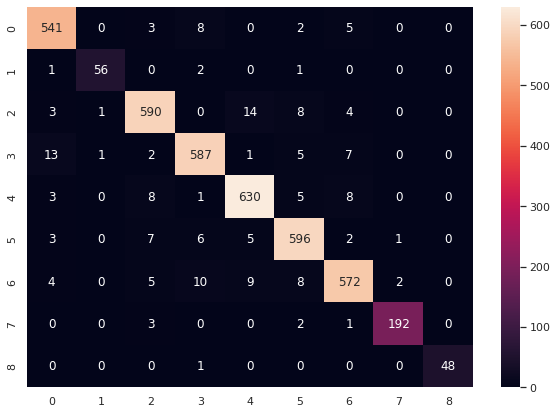

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(10,7)})
sns.heatmap(matrix, fmt='',annot=True)

In [ ]:
model2.save(filepath="SER_model2_96.h5")
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('SER_model2_96.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 256)         1536      
                                                                 
 batch_normalization (BatchN  (None, 2376, 256)        1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 256)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 256)         327936    
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 256)        1024      
 hNormalization)                                                 
                                                        